In [3]:
import pandas as pd
import seaborn
import numpy as np

1) Analyse du jeu de données
Utilisez ce que nous avons vu pendant les TPs. En utilisant les librairies panda et seaborn, indiquez par exemple si le jeu de données contient des données manquantes, explorez les différentes colonnes (type, modalités, plages de valeurs, cardinal, distributions, etc). Commentez.
Exhibez le parcours d’un employé qui a démissionné et celui d’un employé qui n’a pas démissionné. Commentez.
Affichez la matrice de corrélation. Commentez.
Toute autre analyse que vous jugez pertinente est la bienvenue (avec commentaires)

In [4]:
data = pd.read_pickle("data/dataset_RH.pkl") #transform also in a dataframe
df = pd.DataFrame(data[0]) #get just the dataframe
labels = data[1]
df['démissionné'] = labels
df

,Famille d'emploi,Dernière promotion (mois),Dernière augmentation (mois),Début de contrat (années),Ancienneté groupe (années),Etablissement,Âge (années),Parent,Niveau hiérarchique,Salaire (Euros),Statut marital,Véhicule,matricule,démissionné
0,Production,8.510000,7.900000,0.910000,0.970000,27,30,1,1,3199,Marié(e),0,32,0
1,Production,35.119999,22.690001,14.830000,16.299999,7,45,1,2,3861,Marié(e),1,1890,0
2,Production,25.299999,22.139999,17.309999,17.790001,28,49,1,2,4324,PACS,1,1847,0
3,Production,5.240000,5.100000,1.020000,1.750000,27,24,0,1,2641,Célibataire,0,2619,1
4,Production,35.919998,22.840000,8.050000,9.000000,7,46,1,2,5072,Marié(e),1,1963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23852,Support,6.140000,4.750000,11.430000,12.560000,28,35,1,1,2966,Marié(e),0,2210,0
23853,Support,5.510000,4.780000,1.800000,2.430000,28,28,1,1,3044,Marié(e),0,1318,0
23854,Production,6.710000,4.790000,10.430000,16.100000,19,47,1,1,3523,Marié(e),0,1932,0
23855,Support,17.510000,4.470000,13.400000,14.050000,2,35,1,1,3175,Marié(e),0,2014,0


In [5]:
# Check for missing values
missing = df.isna().sum()
print(missing[missing > 0].sort_values(ascending=False))

Series([], dtype: int64)


## No missing values

In [6]:
# General info about the dataframe
print(df.info())

# Basic statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23857 entries, 0 to 23856
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Famille d'emploi              23857 non-null  object 
 1   Dernière promotion (mois)     23857 non-null  float64
 2   Dernière augmentation (mois)  23857 non-null  float64
 3   Début de contrat (années)     23857 non-null  float64
 4   Ancienneté groupe (années)    23857 non-null  float64
 5   Etablissement                 23857 non-null  int64  
 6   Âge (années)                  23857 non-null  int64  
 7   Parent                        23857 non-null  int64  
 8   Niveau hiérarchique           23857 non-null  int64  
 9   Salaire (Euros)               23857 non-null  int64  
 10  Statut marital                23857 non-null  object 
 11  Véhicule                      23857 non-null  int64  
 12  matricule                     23857 non-null  int64  
 13  d

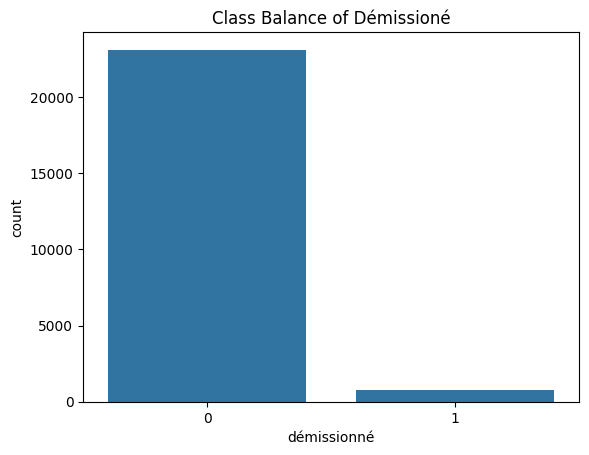

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='démissionné', data=df)
plt.title('Class Balance of Démissioné')
plt.show()

## This show a Imbalance dataset already

In [8]:
df["Famille d\'emploi"].unique()
df = pd.get_dummies(df, columns=["Famille d'emploi"], drop_first=True)
df

,Dernière promotion (mois),Dernière augmentation (mois),Début de contrat (années),Ancienneté groupe (années),Etablissement,Âge (années),Parent,Niveau hiérarchique,Salaire (Euros),Statut marital,Véhicule,matricule,démissionné,Famille d'emploi_Développement Immobilier,Famille d'emploi_Etudes & Technique,Famille d'emploi_IT,Famille d'emploi_Management,Famille d'emploi_Matériel/Equipement,Famille d'emploi_Production,Famille d'emploi_Support
0,8.510000,7.900000,0.910000,0.970000,27,30,1,1,3199,Marié(e),0,32,0,False,False,False,False,False,True,False
1,35.119999,22.690001,14.830000,16.299999,7,45,1,2,3861,Marié(e),1,1890,0,False,False,False,False,False,True,False
2,25.299999,22.139999,17.309999,17.790001,28,49,1,2,4324,PACS,1,1847,0,False,False,False,False,False,True,False
3,5.240000,5.100000,1.020000,1.750000,27,24,0,1,2641,Célibataire,0,2619,1,False,False,False,False,False,True,False
4,35.919998,22.840000,8.050000,9.000000,7,46,1,2,5072,Marié(e),1,1963,0,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23852,6.140000,4.750000,11.430000,12.560000,28,35,1,1,2966,Marié(e),0,2210,0,False,False,False,False,False,False,True
23853,5.510000,4.780000,1.800000,2.430000,28,28,1,1,3044,Marié(e),0,1318,0,False,False,False,False,False,False,True
23854,6.710000,4.790000,10.430000,16.100000,19,47,1,1,3523,Marié(e),0,1932,0,False,False,False,False,False,True,False
23855,17.510000,4.470000,13.400000,14.050000,2,35,1,1,3175,Marié(e),0,2014,0,False,False,False,False,False,False,True


In [9]:
df["Statut marital"].unique()
df = pd.get_dummies(df, columns=["Statut marital"], drop_first=True)
df

,Dernière promotion (mois),Dernière augmentation (mois),Début de contrat (années),Ancienneté groupe (années),Etablissement,Âge (années),Parent,Niveau hiérarchique,Salaire (Euros),Véhicule,...,Famille d'emploi_Production,Famille d'emploi_Support,Statut marital_Célibataire,Statut marital_Divorcé(e),Statut marital_Marié(e),Statut marital_PACS,Statut marital_Séparé(e),Statut marital_Union libre,Statut marital_Veuf(ve),Statut marital_ex PACS
0,8.510000,7.900000,0.910000,0.970000,27,30,1,1,3199,0,...,True,False,False,False,True,False,False,False,False,False
1,35.119999,22.690001,14.830000,16.299999,7,45,1,2,3861,1,...,True,False,False,False,True,False,False,False,False,False
2,25.299999,22.139999,17.309999,17.790001,28,49,1,2,4324,1,...,True,False,False,False,False,True,False,False,False,False
3,5.240000,5.100000,1.020000,1.750000,27,24,0,1,2641,0,...,True,False,True,False,False,False,False,False,False,False
4,35.919998,22.840000,8.050000,9.000000,7,46,1,2,5072,1,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23852,6.140000,4.750000,11.430000,12.560000,28,35,1,1,2966,0,...,False,True,False,False,True,False,False,False,False,False
23853,5.510000,4.780000,1.800000,2.430000,28,28,1,1,3044,0,...,False,True,False,False,True,False,False,False,False,False
23854,6.710000,4.790000,10.430000,16.100000,19,47,1,1,3523,0,...,True,False,False,False,True,False,False,False,False,False
23855,17.510000,4.470000,13.400000,14.050000,2,35,1,1,3175,0,...,False,True,False,False,True,False,False,False,False,False


démissionné                                  1.000000
Statut marital_Célibataire                   0.072513
Famille d'emploi_Production                  0.021242
Famille d'emploi_Etudes & Technique          0.019479
Dernière augmentation (mois)                 0.003011
matricule                                    0.001034
Statut marital_Union libre                  -0.007057
Statut marital_Veuf(ve)                     -0.009308
Statut marital_ex PACS                      -0.010682
Famille d'emploi_IT                         -0.012404
Statut marital_Séparé(e)                    -0.012591
Famille d'emploi_Management                 -0.013484
Statut marital_PACS                         -0.013513
Famille d'emploi_Support                    -0.016009
Statut marital_Divorcé(e)                   -0.016953
Famille d'emploi_Développement Immobilier   -0.019704
Famille d'emploi_Matériel/Equipement        -0.023319
Etablissement                               -0.024174
Statut marital_Marié(e)     

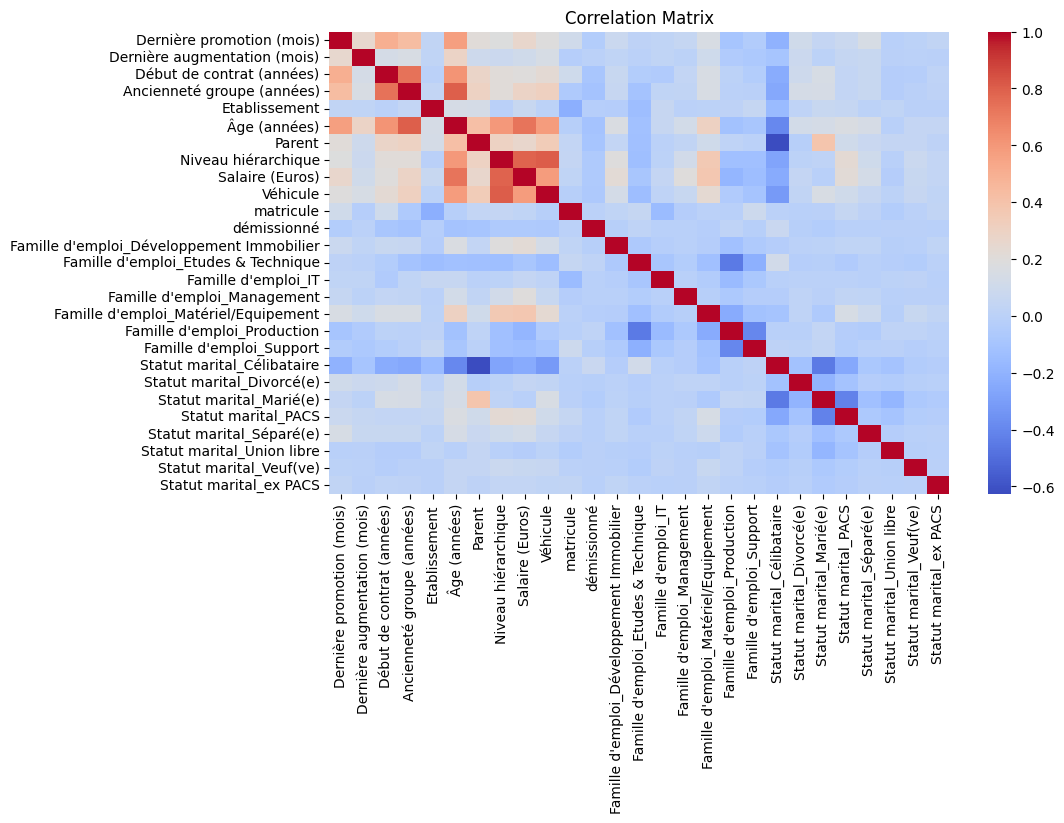

In [10]:
# Compute the correlation matrix
corr = df.corr()

# Show correlation with 'Démissioné'
print(corr['démissionné'].sort_values(ascending=False))

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

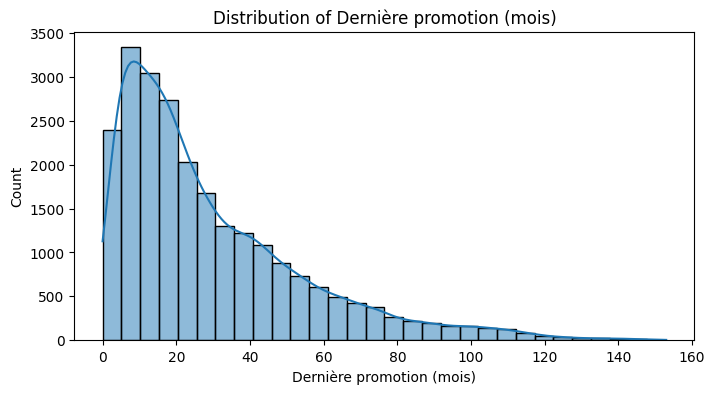

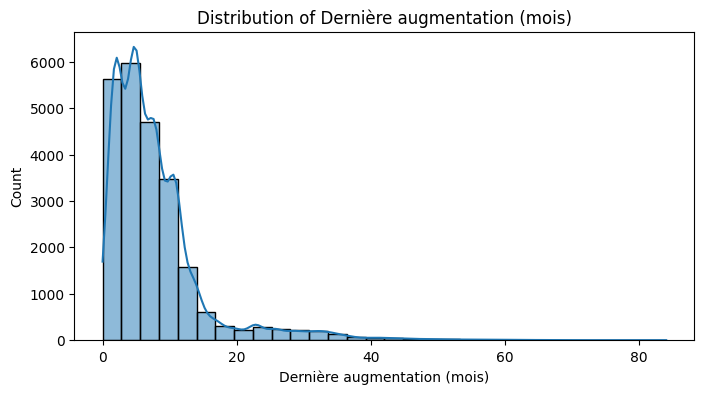

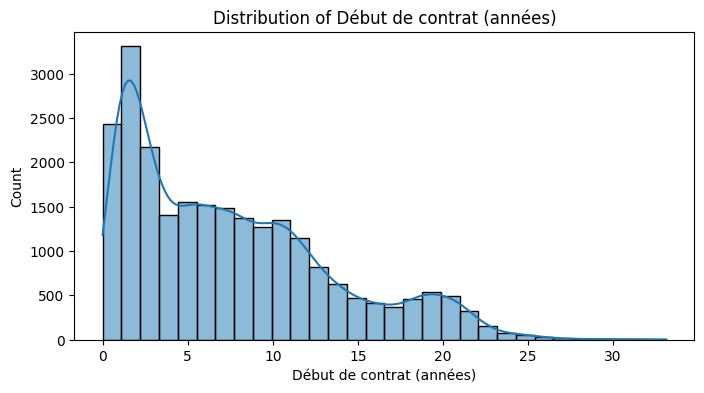

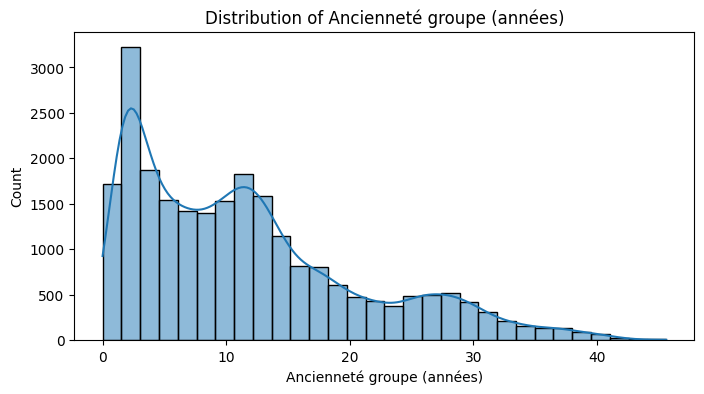

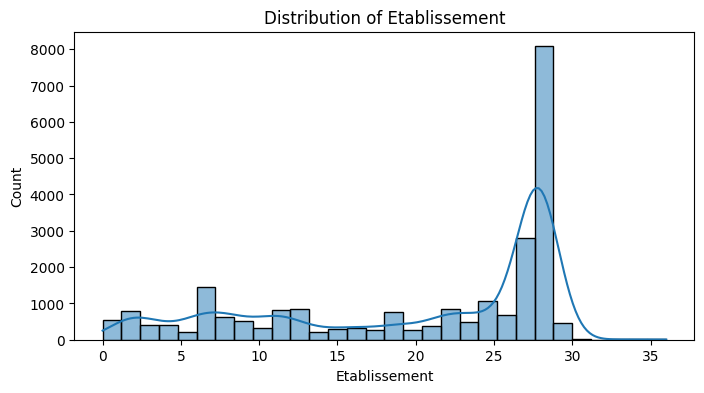

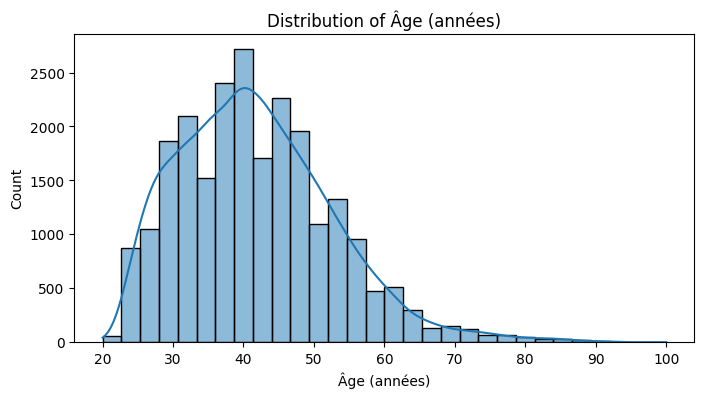

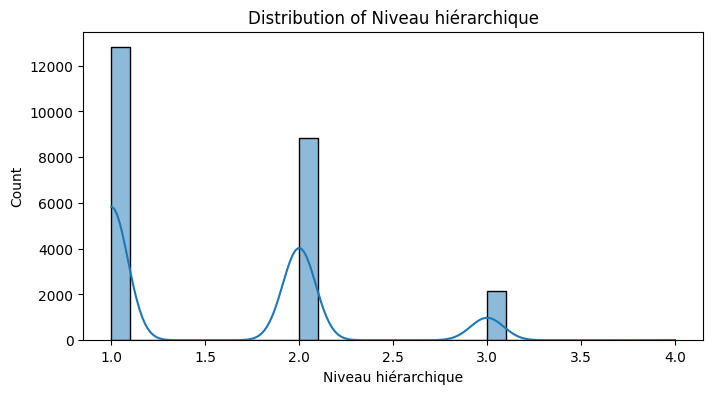

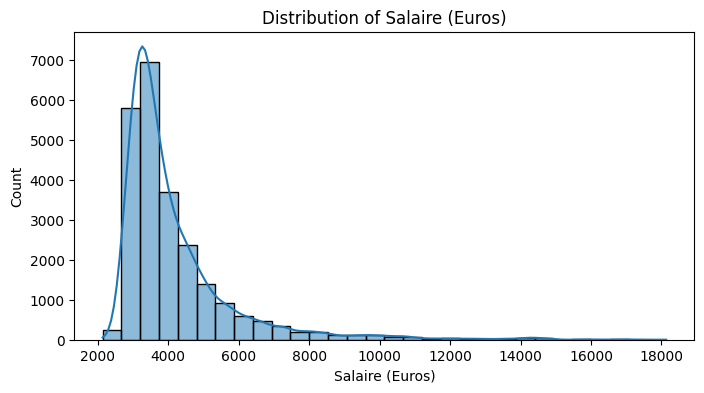

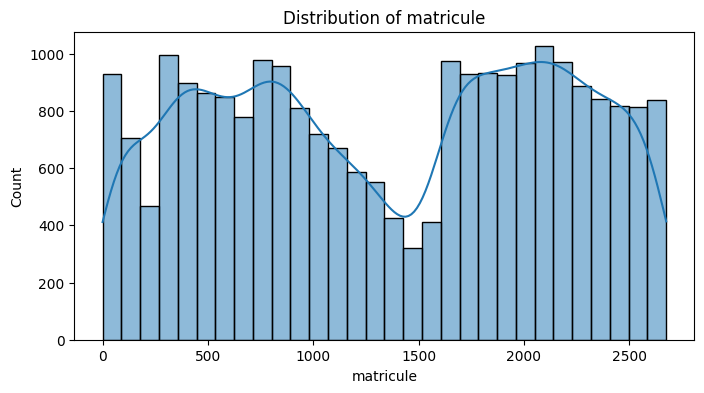

In [11]:

numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
#drop the boolean ones
exclude_cols = ['Parent', 'démissionné', 'Véhicule']

# Filter out the columns to exclude
numeric_cols_filtered = [col for col in numeric_cols if col not in exclude_cols]
for col in numeric_cols_filtered:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

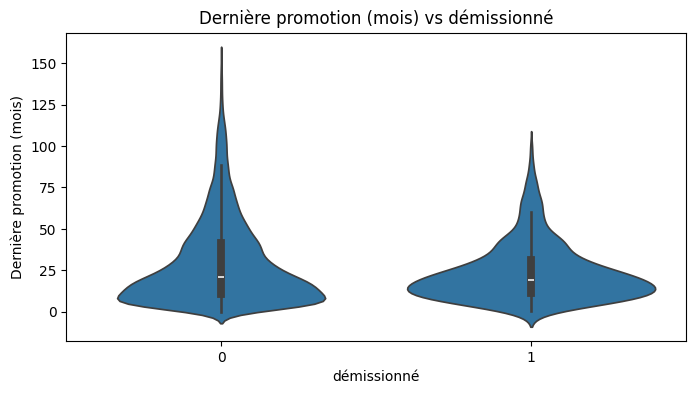

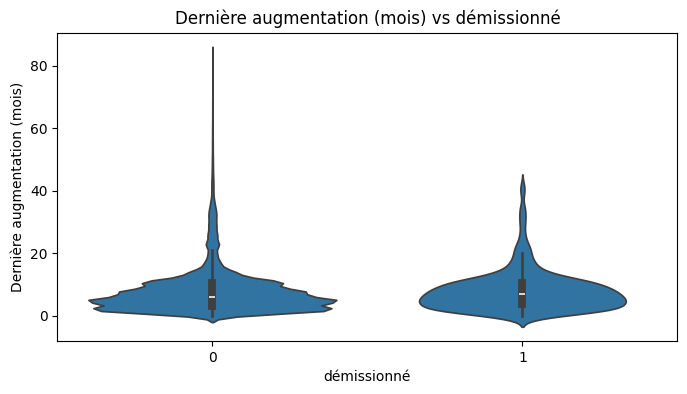

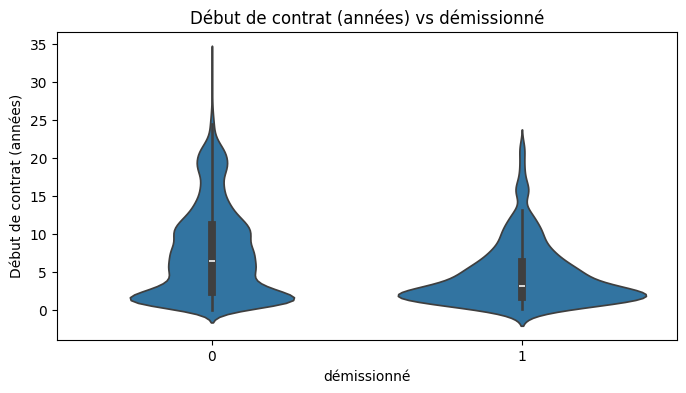

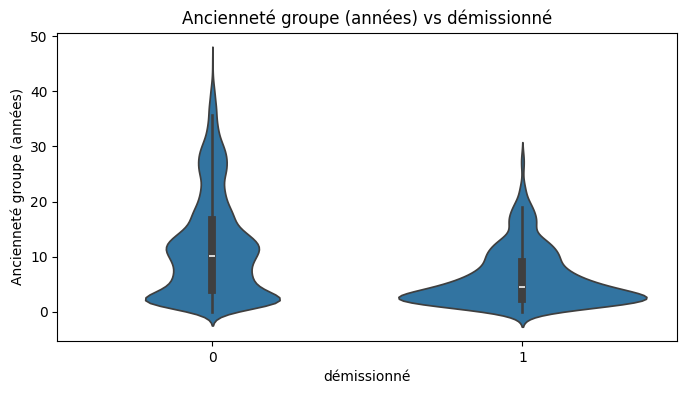

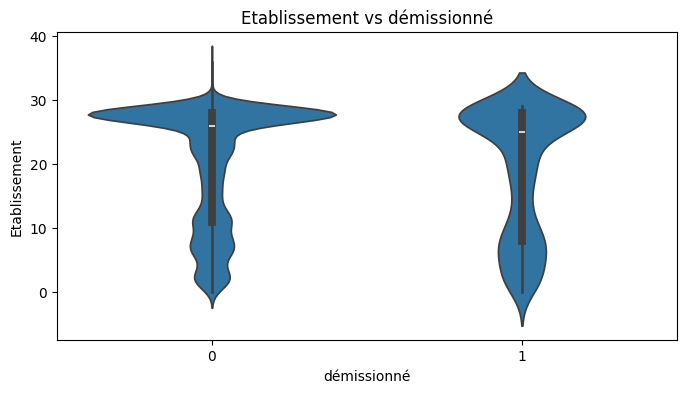

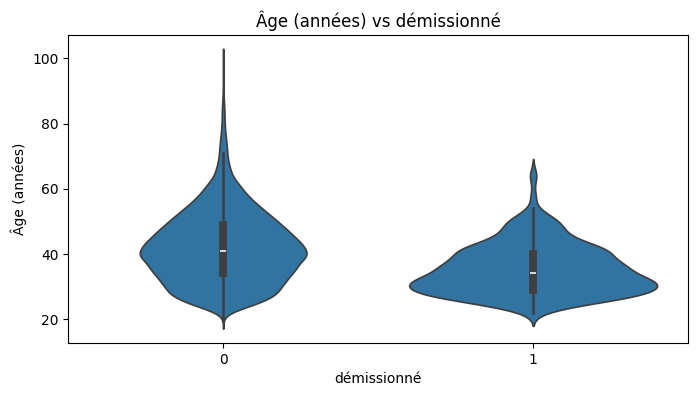

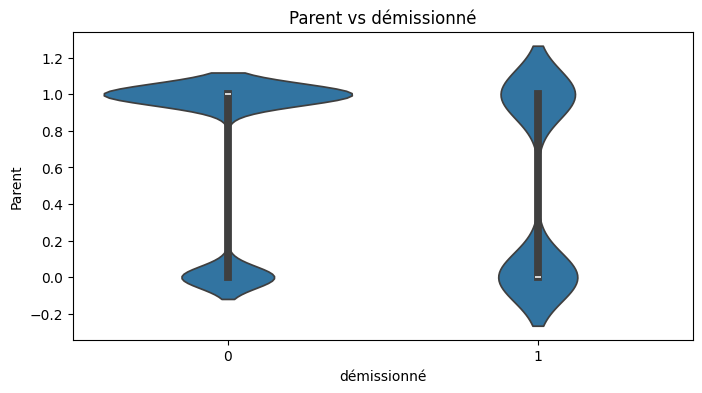

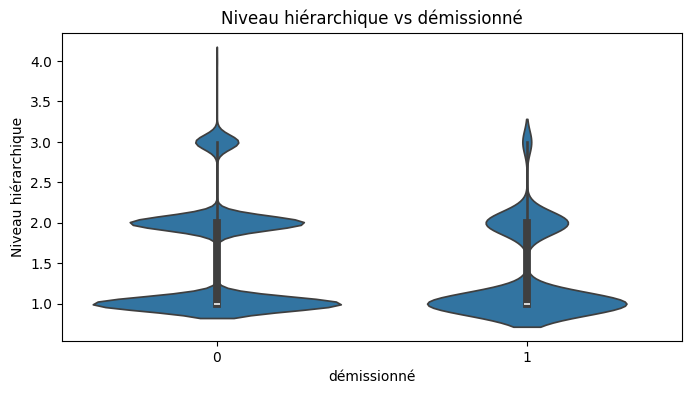

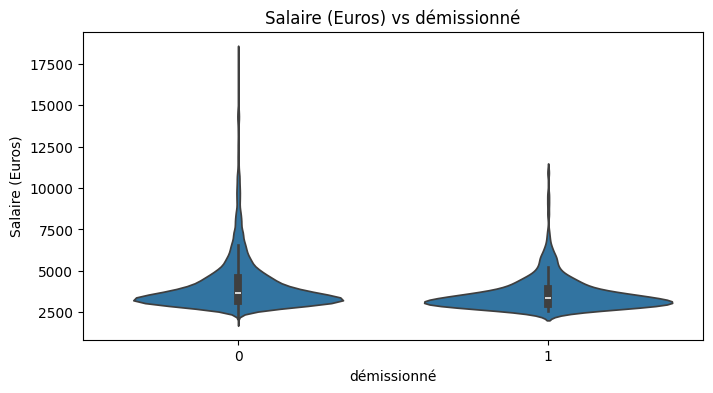

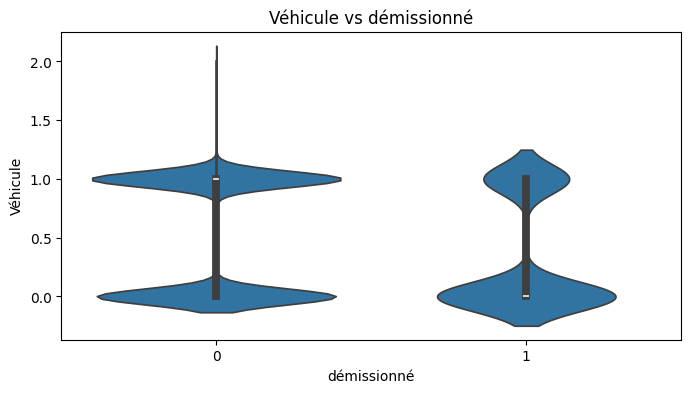

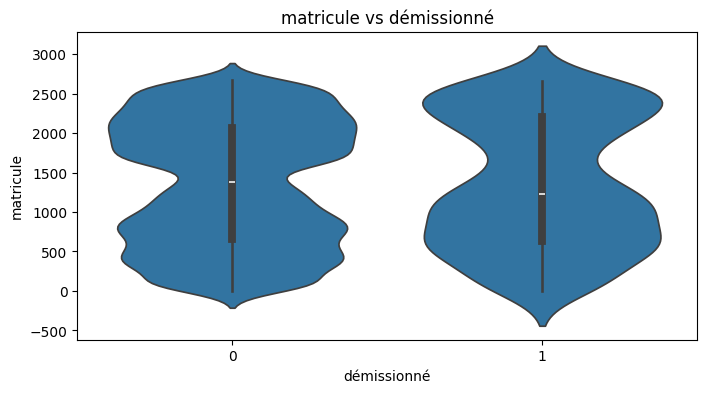

In [12]:
exclude_cols = ['démissionné']
numeric_cols_filtered = [col for col in numeric_cols if col not in exclude_cols]
for col in numeric_cols_filtered:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='démissionné', y=col, data=df)
    plt.title(f'{col} vs démissionné')
    plt.show()

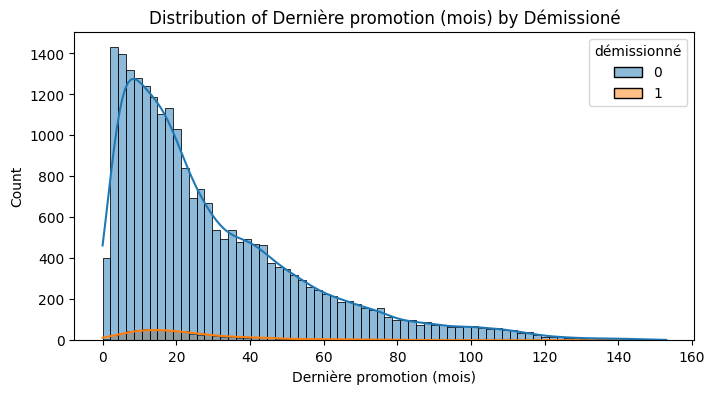

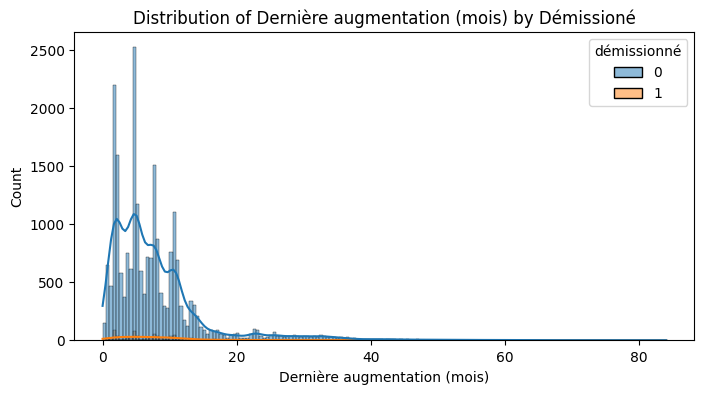

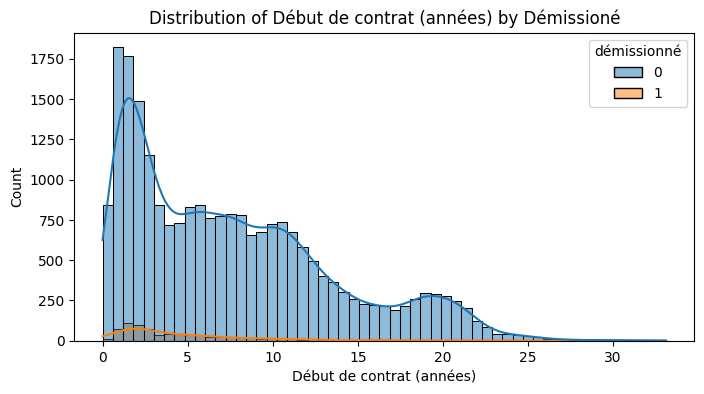

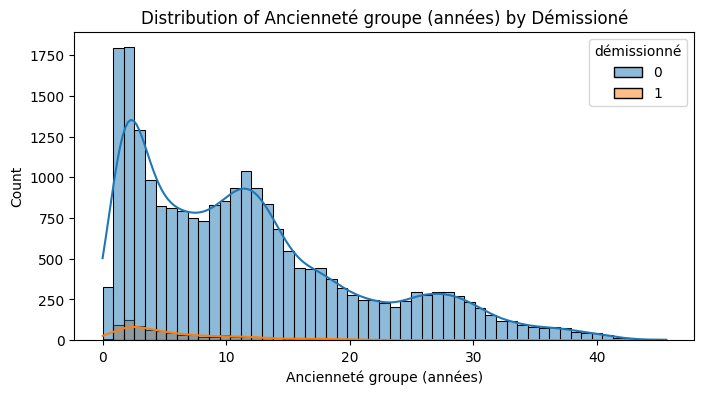

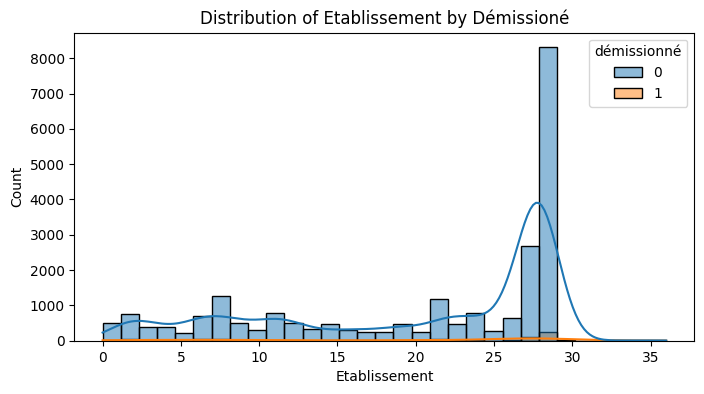

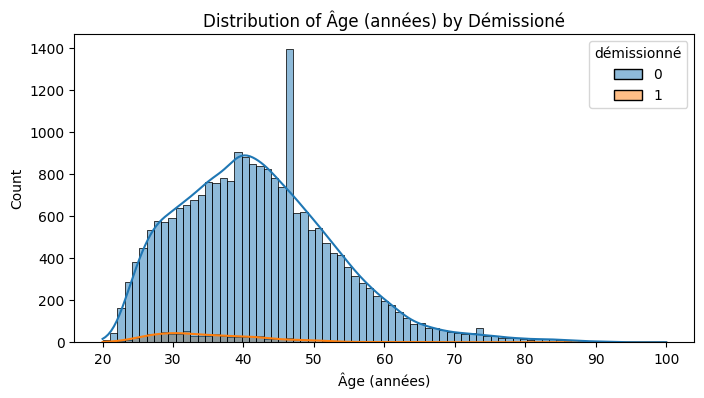

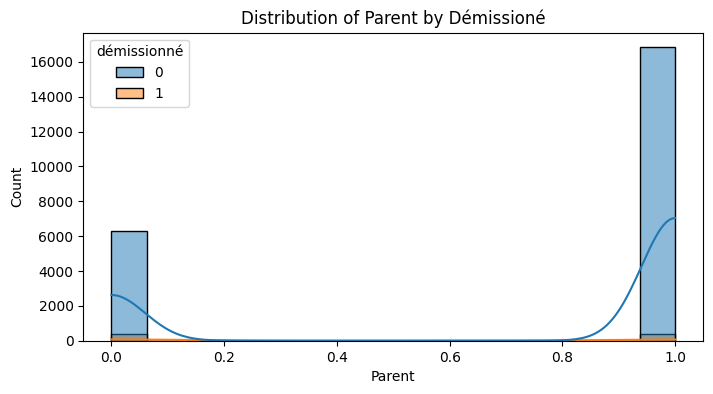

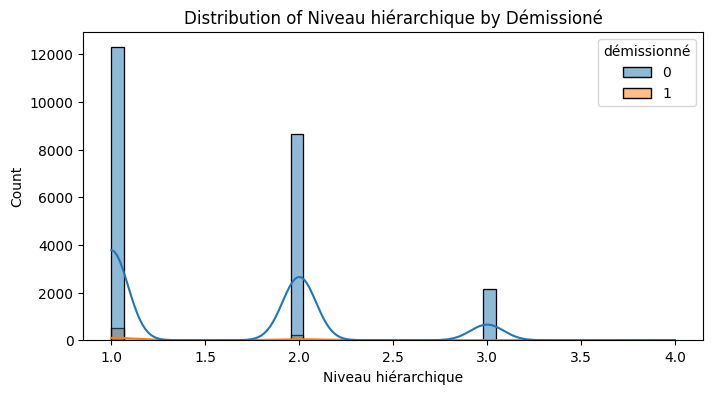

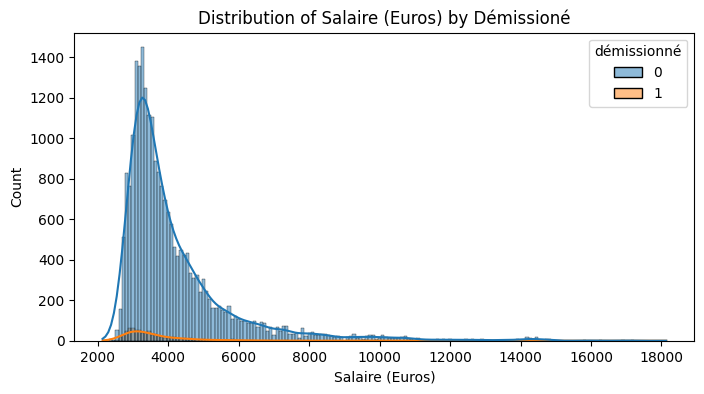

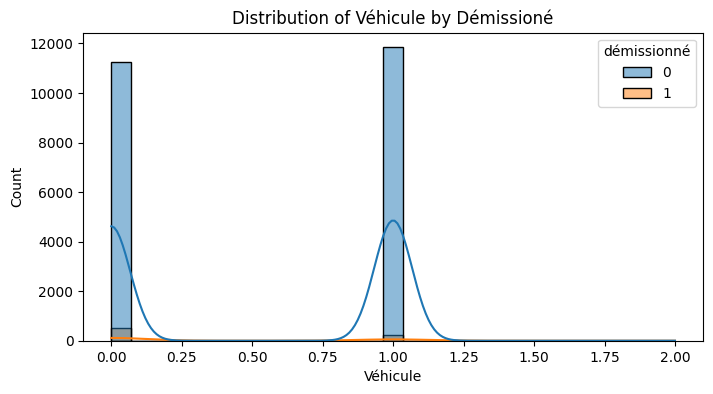

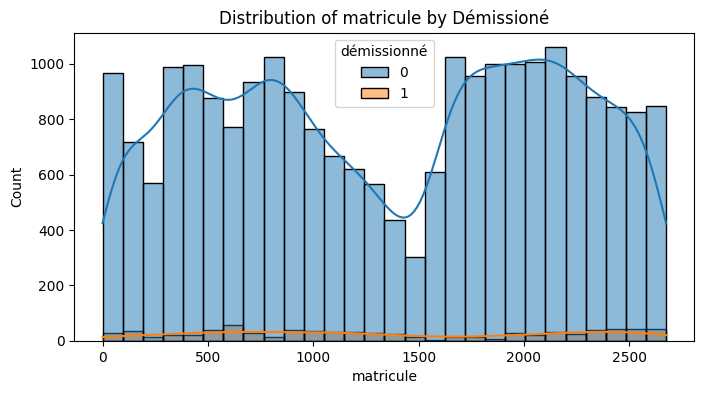

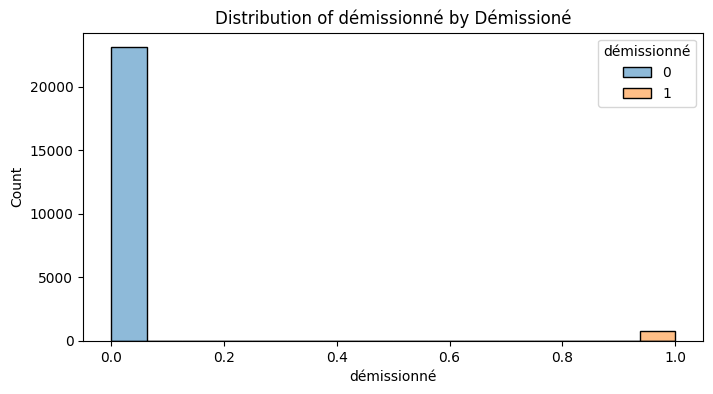

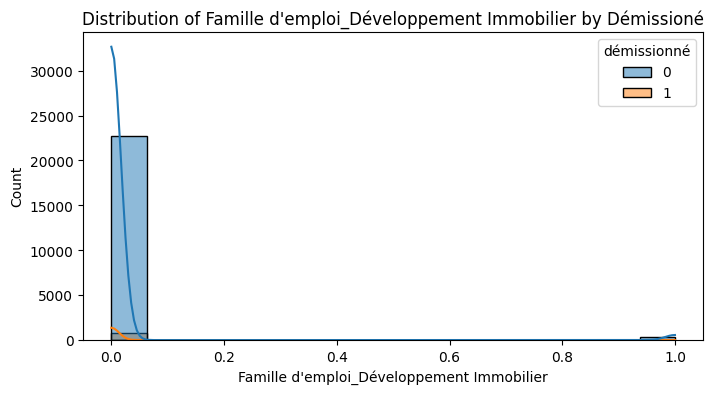

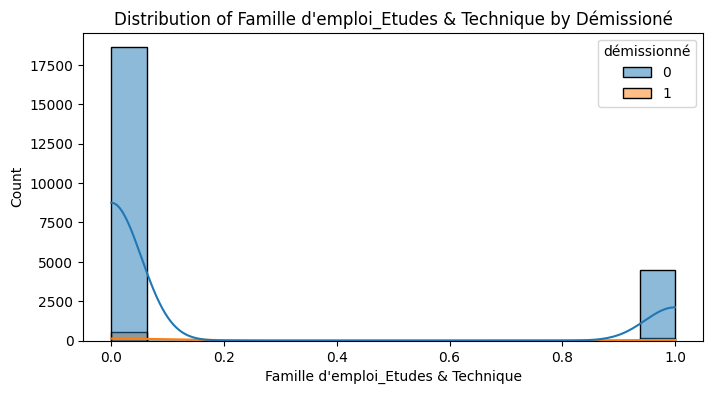

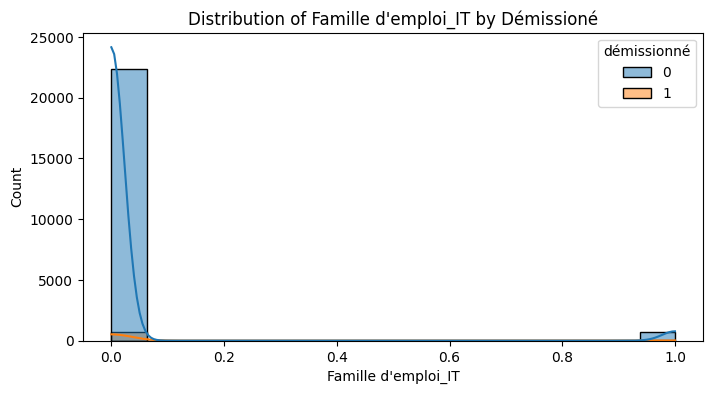

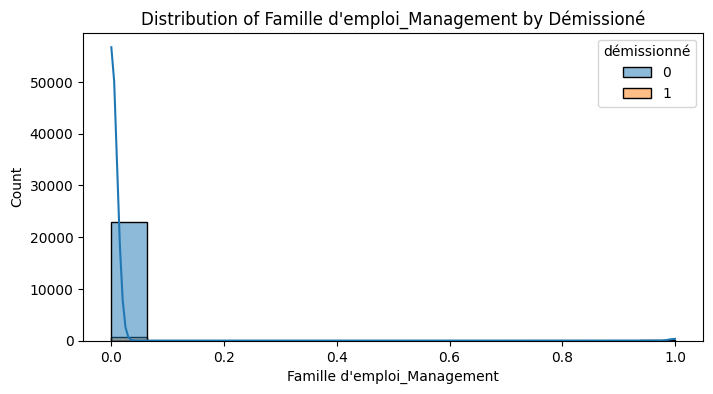

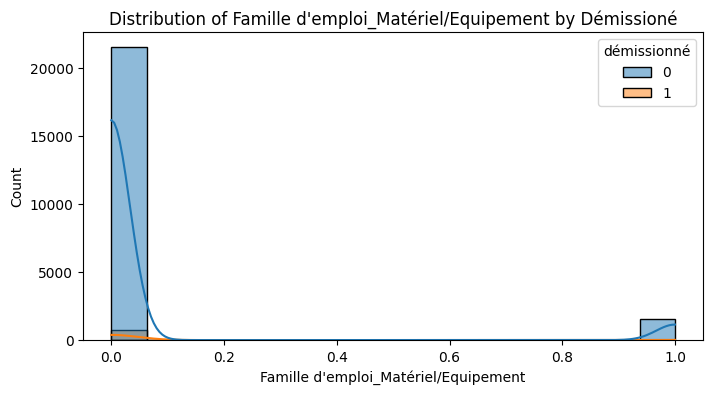

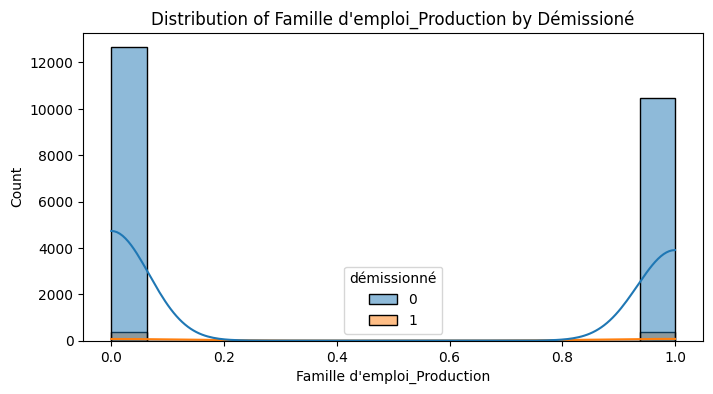

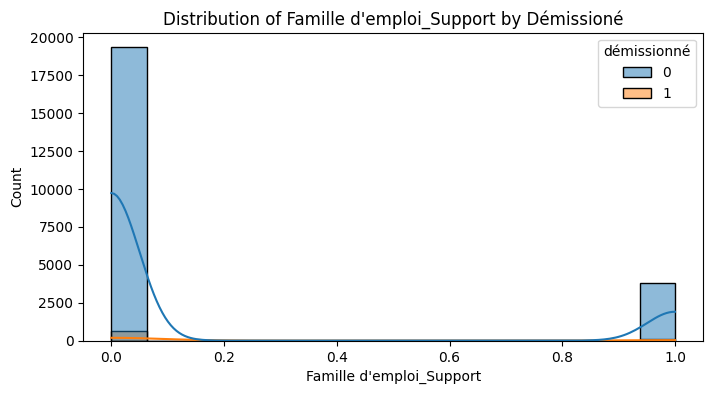

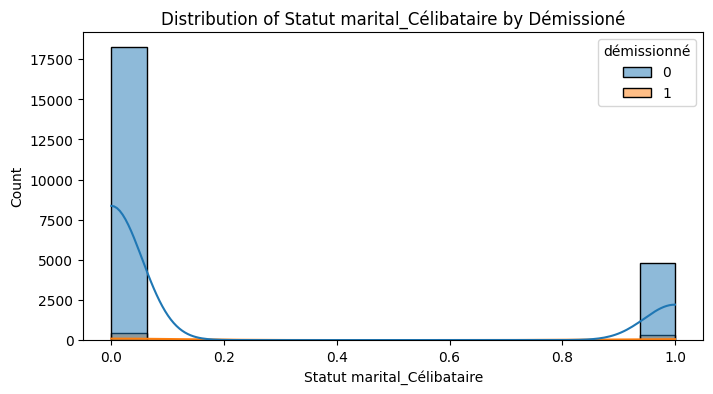

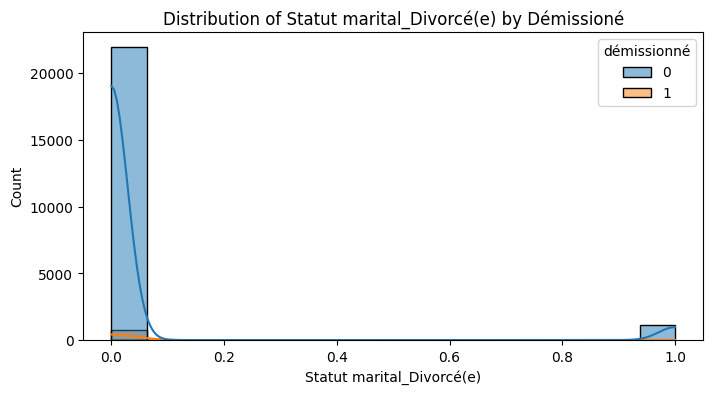

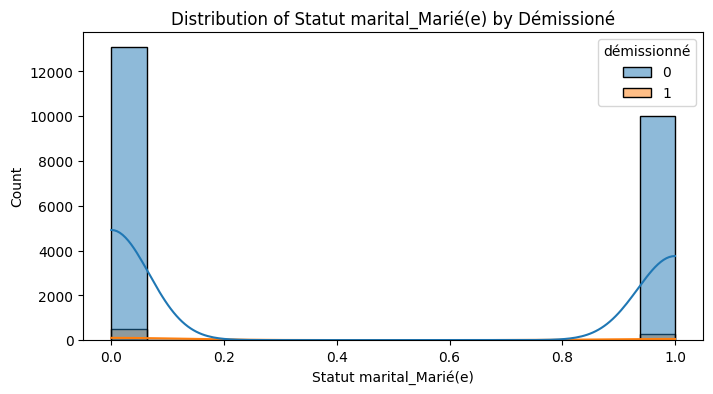

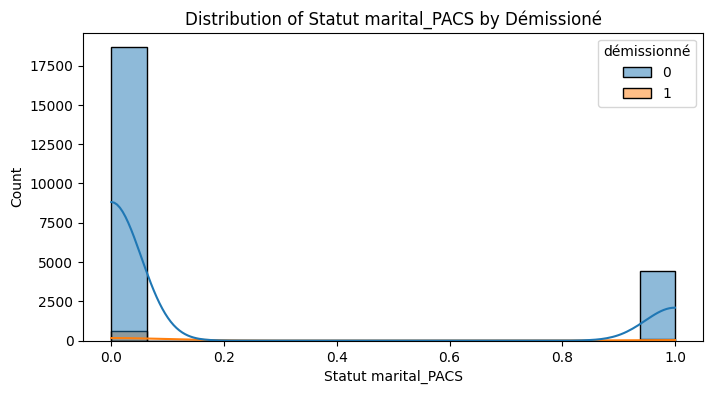

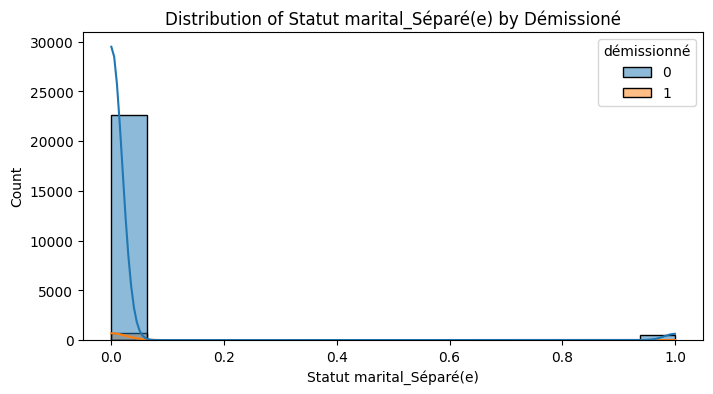

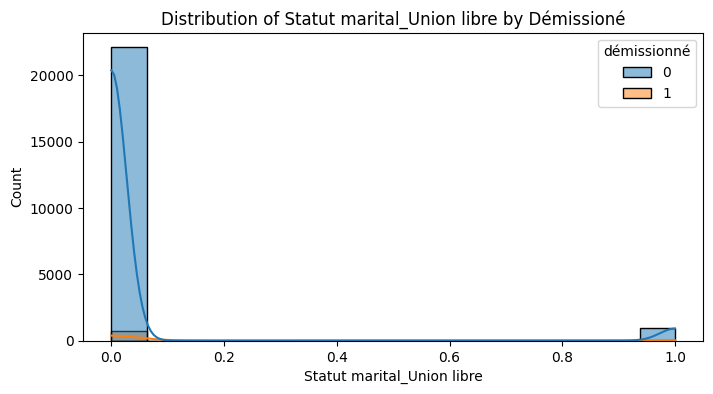

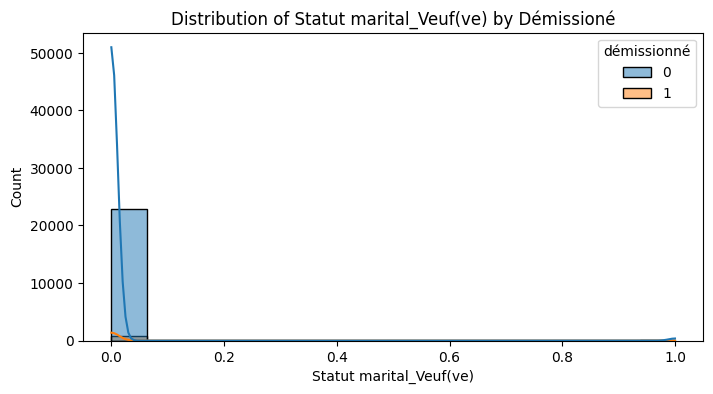

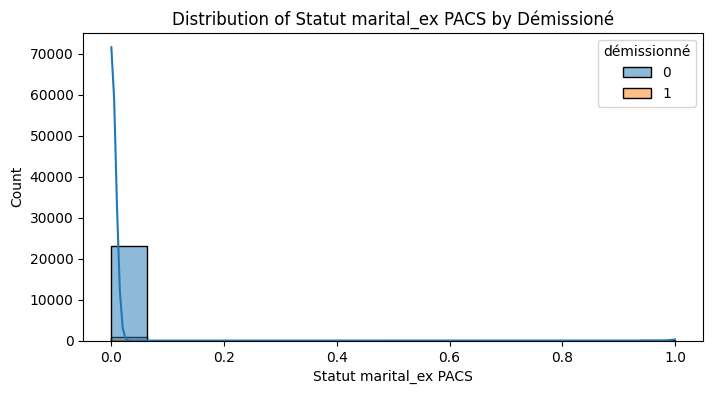

In [13]:
for col in df.columns:
    if df[col].dtype != 'object':  # Only plot numeric columns
        plt.figure(figsize=(8, 4))
        sns.histplot(data=df, x=col, hue='démissionné', kde=True)
        plt.title(f'Distribution of {col} by Démissioné')
        plt.show()

In [14]:
profile = df.groupby('démissionné').mean().T.sort_values(by=1, ascending=False)
print(profile)

démissionné                                          0            1
Salaire (Euros)                            4185.813220  3635.705960
matricule                                  1361.107437  1365.797351
Âge (années)                                 41.979482    35.270199
Dernière promotion (mois)                    29.644239    23.845894
Etablissement                                20.234568    18.950993
Dernière augmentation (mois)                  7.930876     8.060728
Ancienneté groupe (années)                   11.808123     6.245868
Début de contrat (années)                     7.623685     4.673563
Niveau hiérarchique                           1.561423     1.344371
Famille d'emploi_Production                   0.452169     0.512583
Parent                                        0.728422     0.484768
Statut marital_Célibataire                    0.208856     0.378808
Statut marital_Marié(e)                       0.432820     0.333775
Véhicule                                      0.

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, f1_score
import xgboost as xgb  # Import XGBoost

# Handling Class Imbalance - Corrected to avoid data leakage
X = df.drop(columns=['démissionné'])
y = df['démissionné']

# Train-Test Split BEFORE applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scaling Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler on test set

# Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train_resampled)
dt_preds = dt_model.predict(X_test_scaled)

# Logistic Regression Model
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train_scaled, y_train_resampled)
lr_preds = lr_model.predict(X_test_scaled)

# XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train_scaled, y_train_resampled)
xgb_preds = xgb_model.predict(X_test_scaled)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(classification_report(y_true, y_pred))
    print(f"F1-Score: {f1_score(y_true, y_pred)}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred)}")

# Evaluate all models
evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("XGBoost", y_test, xgb_preds)


c:\Users\mateu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      4621
           1       0.07      0.35      0.12       151

    accuracy                           0.84      4772
   macro avg       0.52      0.60      0.51      4772
weighted avg       0.95      0.84      0.88      4772

F1-Score: 0.11896745230078563
ROC-AUC: 0.6011621291225918

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      4621
           1       0.07      0.24      0.11       151

    accuracy                           0.87      4772
   macro avg       0.52      0.57      0.52      4772
weighted avg       0.94      0.87      0.91      4772

F1-Score: 0.10666666666666667
ROC-AUC: 0.5664028742954349

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4621
           1       0.23      0.21    

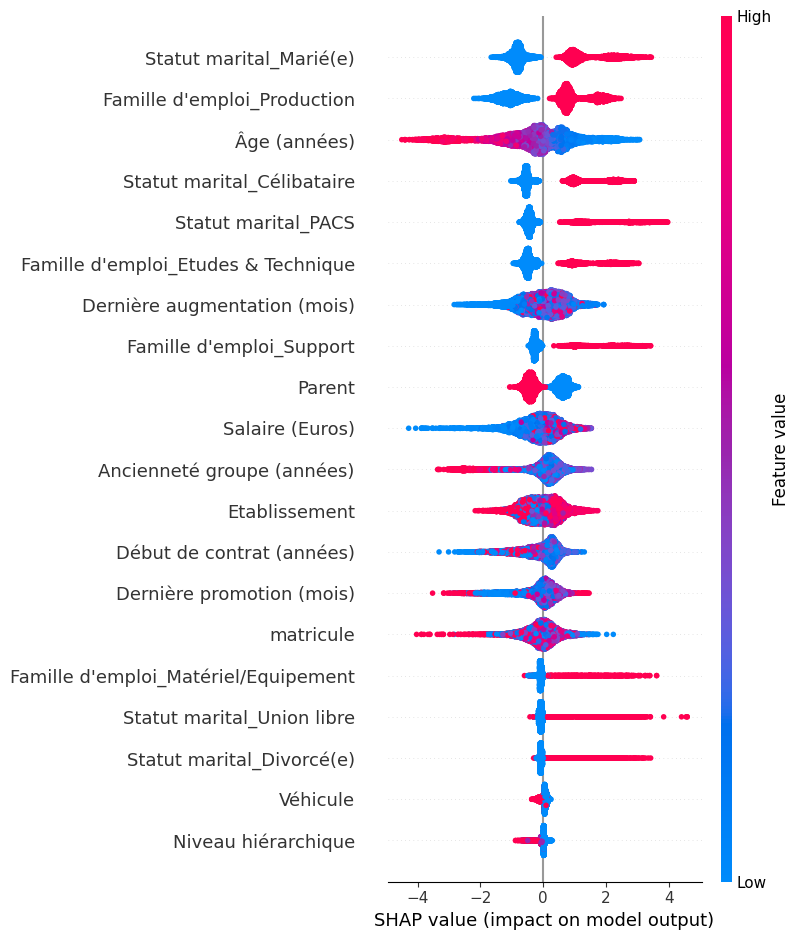

In [16]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test)